Back to the main [Index](index.ipynb) <a id="top"></a>

# Structure object

The `AbiPy` structure inherits from the `pymatgen` structure. 
One has therefore access to all the methods and tools already available in `pymatgen`.
In this notebook, we mainly focus on the extensions added by `AbiPy`. 
For the features provided by pymatgen, please consult the 
[official pymatgen documentation](http://pymatgen.org/usage.html#structures-and-molecules)

## Table of Contents
[[back to top](#top)]

- [Reading a structure from file](#Reading-a-structure-from-file)
- [Converting to other formats](#Converting-to-other-formats)
- [Getting information on the structure](#Getting-information-on-the-structure)
- [abistruct.py script](#abistruct.py)

In [1]:
from __future__ import division, print_function, unicode_literals

import warnings
warnings.filterwarnings("ignore") # to get rid of deprecation warnings

# Import abipy modules
from abipy import abilab
from abipy.abilab import Structure
import abipy.data as abidata

# Useful tools we'll need later on.
from pprint import pprint
import numpy as np

# This line configures matplotlib to show figures embedded in the notebook.
# Replace `inline` with `notebook` in classic notebook
%matplotlib inline   

# Option available in jupyterlab. See https://github.com/matplotlib/jupyter-matplotlib
#%matplotlib widget  

## Reading a structure from file
[[back to top](#top)]

It is possible to initialize a crystalline structure from different file formats: 

   * CIF
   * POSCAR/CONTCAR
   * CHGCAR 
   * LOCPOT,
   * vasprun.xml
   * CSSR 
   * ABINIT Netcdf files 
   * pymatgen's JSON serialized structures

Note, in particular, that one can initialize the structure from the netcdf files  
produced by Abinit (`GSR.nc`, `WFK.nc`, etc) as well as output files in text format 
such as the Abinit input/output files or even the DDB file.

To initialize the structure from a CIF file use the `from_file` method:

In [2]:
# abidata.cif_file returns one of the CIF files shipped with AbiPy.
structure = Structure.from_file(abidata.cif_file("si.cif"))
print(structure)

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0     0     0
  1  Si    0.25  0.25  0.25


To read the structure from a netcdf file:

In [3]:
structure = Structure.from_file(abidata.ref_file("si_nscf_GSR.nc"))

# Use to_string with verbose > 0 to get more info 
print(structure.to_string(verbose=1))

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000

Spglib space group info (magnetic symmetries not taken into account).
Spacegroup: Fd-3m (227), Hall: F 4d 2 3 -1d, Abinit spg_number: 227
Crystal_system: cubic, Lattice_type: cubic, Point_group: m-3m

  Idx  Symbol    Reduced_Coords              Wyckoff      EqIdx
-----  --------  --------------------------  ---------  -------
    0  Si        +0.00000 +0.00000 +0.00000  (2a)             0
    1  Si        +0.25000 +0.25000 +0.25000  (2a)             0

Abinit Spacegroup: spgid: 227, num_spatial_symmetries: 48, has_timerev: True, symmorphic: True


Use `to_abivars` to get the list of Abinit variables in a python dictionary:

In [4]:
structure.to_abivars()

{'natom': 2,
 'ntypat': 1,
 'typat': array([1, 1]),
 'znucl': [14],
 'xred': array([[0.  , 0.  , 0.  ],
        [0.25, 0.25, 0.25]]),
 'acell': [1.0, 1.0, 1.0],
 'rprim': array([[6.32850055, 0.        , 3.6537615 ],
        [2.10950018, 5.96656754, 3.6537615 ],
        [0.        , 0.        , 7.30752299]])}

and `abi_string` to get a string that can be used directly in the input file:

In [5]:
print(structure.abi_string)

 natom 2
 ntypat 1
 typat 1 1
 znucl 14
 xred
    0.0000000000    0.0000000000    0.0000000000
    0.2500000000    0.2500000000    0.2500000000
 acell    1.0    1.0    1.0
 rprim
    6.3285005521    0.0000000000    3.6537614973
    2.1095001840    5.9665675402    3.6537614973
    0.0000000000    0.0000000000    7.3075229946


To visualize the structure with matplotlib, use:

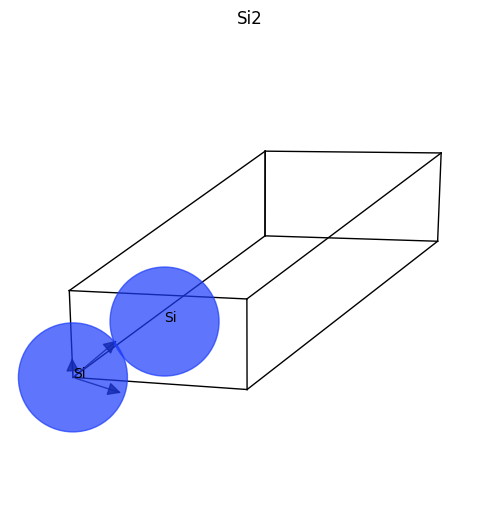

In [6]:
structure.plot();

The matplotlib version is minimalistic but it plays well with jupyter notebooks.
For a more advanced visualization we suggest using a specialized graphical applications.
Fortunately, one can invoke (already installed) external applications directly from AbiPy with e.g.

In [7]:
# structure.visualize("vesta")

To get a structure from the materials project database 
(https://www.materialsproject.org ), use:

In [8]:
# You can pass the api_key or set the env variable PMG_MAPI_KEY in your ~/.pmgrc.yaml files.
si2_mp = Structure.from_mpid("mp-149", api_key=None)
print(si2_mp)

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c    magmom
---  ----  ----  ----  ----  --------
  0  Si    0.25  0.25  0.25        -0
  1  Si    0     0     0           -0


In some cases, we have multiple structures and we need to compare the lattice parameters. 
Use `dataframes_from_structures` to build a pandas DataFrame:

In [9]:
dfs = abilab.dataframes_from_structures([structure, si2_mp], index=["CIF", "MP"])

then we can compare the lattice parameters with:

In [10]:
dfs.lattice

,formula,natom,alpha,beta,gamma,a,b,c,volume,abispg_num,spglib_symb,spglib_num,spglib_lattice_type
CIF,Si2,2,60.0,60.0,60.0,3.866975,3.866975,3.866975,40.888292,227,Fd-3m,227,cubic
MP,Si2,2,60.0,60.0,60.0,3.866975,3.866975,3.866975,40.888293,None,Fd-3m,227,cubic


Note that all AbiPy robots have this feature built-in. 
Sometimes it is much easier to build a robot directly from files 
and then compare the structures with e.g. `robot.get_lattice_dataframe()`.

## Converting to other formats
[[back to top](#top)]

Use `structure.convert(format)` to get the string representation in the new format:

In [11]:
for fmt in ["cif", "POSCAR", "qe"]:
    print((" Abinit --> %s " % fmt).center(80, "*"))
    print(structure.convert(fmt=fmt))

******************************** Abinit --> cif ********************************
# generated using pymatgen
data_Si
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   3.86697464
_cell_length_b   3.86697464
_cell_length_c   3.86697464
_cell_angle_alpha   60.00000000
_cell_angle_beta   60.00000000
_cell_angle_gamma   60.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   Si
_chemical_formula_sum   Si2
_cell_volume   40.88829233
_cell_formula_units_Z   2
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Si  Si0  1  0.00000000  0.00000000  0.00000000  1
  Si  Si1  1  0.25000000  0.25000000  0.25000000  1

****************************** Abinit --> POSCAR *******************************
Si2
1.0
3.348898271358 0.000000000000 1.933487318446
1.116299423768 3.157371569587 1.933487

## Getting information on the structure
[[back to top](#top)]

In [12]:
print(structure.reciprocal_lattice)

1.876195 -0.663335 0.000000
0.000000 1.990005 0.000000
-0.938097 -0.663335 1.624832


In [13]:
structure.reciprocal_lattice.matrix.T @ structure.lattice.matrix / (2 * np.pi)

array([[ 1.00000000e+00,  0.00000000e+00,  4.88345168e-17],
       [-4.96958869e-17,  1.00000000e+00,  1.12274184e-16],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [14]:
# List of high-symmetry k-points.
print(structure.hsym_kpoints)

0) [+0.000, +0.000, +0.000], name: $\Gamma$, weight: 0.000
1) [+0.500, +0.000, +0.500], name: X, weight: 0.000
2) [+0.500, +0.250, +0.750], name: W, weight: 0.000
3) [+0.375, +0.375, +0.750], name: K, weight: 0.000
4) [+0.000, +0.000, +0.000], name: $\Gamma$, weight: 0.000
5) [+0.500, +0.500, +0.500], name: L, weight: 0.000
6) [+0.625, +0.250, +0.625], name: U, weight: 0.000
7) [+0.500, +0.250, +0.750], name: W, weight: 0.000
8) [+0.500, +0.500, +0.500], name: L, weight: 0.000
9) [+0.375, +0.375, +0.750], name: K, weight: 0.000
10) [+0.625, +0.250, +0.625], name: U, weight: 0.000
11) [+0.500, +0.000, +0.500], name: X, weight: 0.000


The method `calc_ksampling` allows one to get an efficient sampling of the Brillouin zone 
by just specifying the number of divisions to be used for the smallest lattice vector of the reciprocal lattice:

In [15]:
pprint(structure.calc_ksampling(nksmall=10))

{

'ngkpt': array([10, 10, 10]),
 'shiftk': array([[0.5, 0.5, 0.5],
       [0.5, 0. , 0. ],
       [0. , 0.5, 0. ],
       [0. , 0. , 0.5]])}


To get the recommended high symmetry $k$-path in reduced coordinates:

In [16]:
structure.calc_kptbounds()

array([[0.   , 0.   , 0.   ],
       [0.5  , 0.   , 0.5  ],
       [0.5  , 0.25 , 0.75 ],
       [0.375, 0.375, 0.75 ],
       [0.   , 0.   , 0.   ],
       [0.5  , 0.5  , 0.5  ],
       [0.625, 0.25 , 0.625],
       [0.5  , 0.25 , 0.75 ],
       [0.5  , 0.5  , 0.5  ],
       [0.375, 0.375, 0.75 ],
       [0.625, 0.25 , 0.625],
       [0.5  , 0.   , 0.5  ]])

The high-symmetry q-path is automatically selected assuming
the structure fulfills the convention described in [Setyawan2010](https://doi.org/10.1016/j.commatsci.2010.05.010)

To visualize the Brillouin zone with matplotlib:

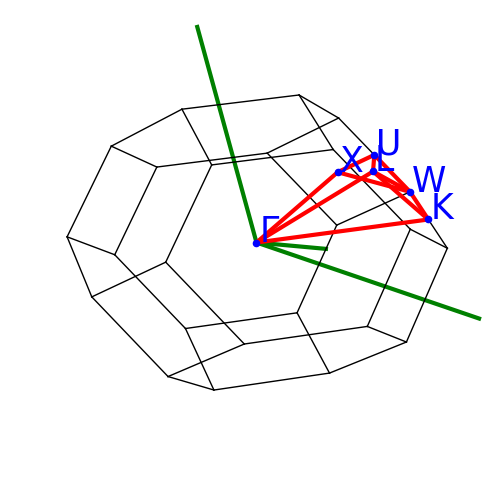

In [17]:
structure.plot_bz();

To get the number of valence electrons for a given set of pseudopotentials:

In [18]:
structure.num_valence_electrons(pseudos=abidata.pseudos("14si.pspnc"))

8

To visualize the X-ray diffraction plot with pymatgen XRDCalculator

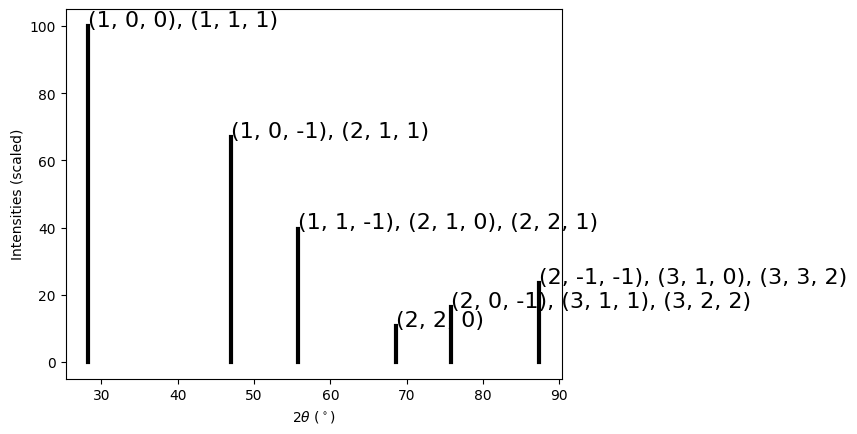

In [19]:
structure.plot_xrd();

## abistruct.py 
[[back to top](#top)]

`abistruct.py` provides a handy command line interface to operate on structure objects 
constructed from external files. 
There are several options available as well an interface to the [materials project](http://materialsproject.org/)
and the [COD](http://www.crystallography.net/cod/) database.

In [20]:
!abistruct.py --help

usage: abistruct.py [-h] [-V]
                    {spglib,abispg,convert,print,supercell,abisanitize,primitive,irefine,conventional,proto,wyckoff,tensor_site,neighbors,interpolate,xrd,oxistate,ipython,notebook,panel,kpath,bz,ngkpt,ktables,abikmesh,lgk,kstar,keq,visualize,mp_id,mp_match,mp_search,mp_pd,mp_ebands,cod_search,cod_id,animate}
                    ...

optional arguments:
  -h, --help            show this help message and exit
  -V, --version         show program's version number and exit

subcommands:
  Valid subcommands, use command --help for help

  {spglib,abispg,convert,print,supercell,abisanitize,primitive,irefine,conventional,proto,wyckoff,tensor_site,neighbors,interpolate,xrd,oxistate,ipython,notebook,panel,kpath,bz,ngkpt,ktables,abikmesh,lgk,kstar,keq,visualize,mp_id,mp_match,mp_search,mp_pd,mp_ebands,cod_search,cod_id,animate}
                        sub-command help
    spglib              Analyze structure with spglib.
    abispg              Extract/Compute Abin

Back to the main [Index](index.ipynb)